![](images/ds_rural.png)

# Módulo 4

## Aplicações de Aprendizado de Máquina

### Índice de precipitação pluvial no Brazil

In [1]:
# importando as bibliotecas
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# leitura dos dados
clima_data = pd.read_csv('data/weather.csv', delimiter=',')
clima_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
# dimensao da matriz (dataframe)
clima_data.shape

(366, 22)

In [4]:
# Estatisticas basicas
clima_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [6]:
# Criando a matriz de exemplos x caracteristicas
XC = clima_data.iloc[:,0]
# Criando o vetor objetivo
yc =clima_data.iloc[:,1]
# verificando as dimensoes dos vetores
print(XC.head())
print(yc.head())

0     8.0
1    14.0
2    13.7
3    13.3
4     7.6
Name: MinTemp, dtype: float64
0    24.3
1    26.9
2    23.4
3    15.5
4    16.1
Name: MaxTemp, dtype: float64


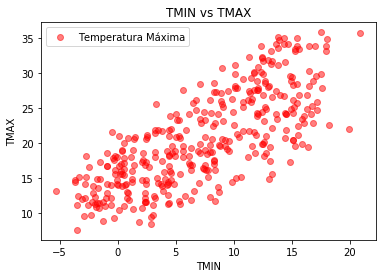

In [7]:
# visualizar os dados antes de aplicar o algoritmo
plt.scatter(XC, yc, color='red',marker='o',alpha=0.5,label='Temperatura Máxima')
plt.title('TMIN vs TMAX')  
plt.xlabel('TMIN')  
plt.ylabel('TMAX') 
plt.legend()
plt.show()

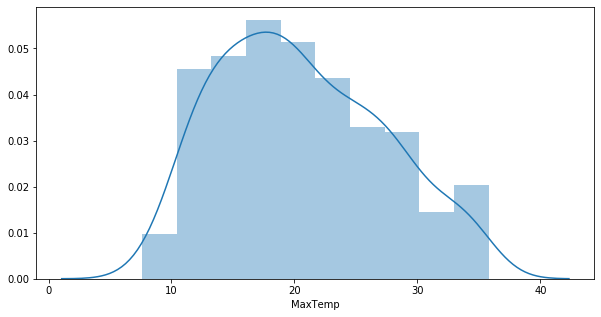

In [57]:
# visualizar a temperatura media maxima
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(clima_data['MaxTemp']);

In [9]:
# unifirmizando os valores: x = independente, y=dependente
X = clima_data['MinTemp'].values.reshape(-1,1)
y = clima_data['MaxTemp'].values.reshape(-1,1)
#print(X)

In [11]:
# split: particionando os conjuntos: treinamento = 80% e teste = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# instanciar o metodo de regressao e treinar o algoritmo
lr = LinearRegression()  
lr.fit(X_train, y_train) # treinamento do algorritmo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# encontrar as intersecoes
print(lr.intercept_)
# calcular a inclinacao da reta
print(lr.coef_)

[14.56202411]
[[0.81953755]]


In [ ]:
# linha reta
#yy = (lr_coef_[0])*xx + lr.intercep_ 

In [15]:
# fazer predicoes
y_pred = lr.predict(X_test)

In [16]:
# comparacao temperatura atual e temperatura prognosticada
df = pd.DataFrame({'Atual': y_test.flatten(), 'Predição': y_pred.flatten()})
df

,Atual,Predição
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


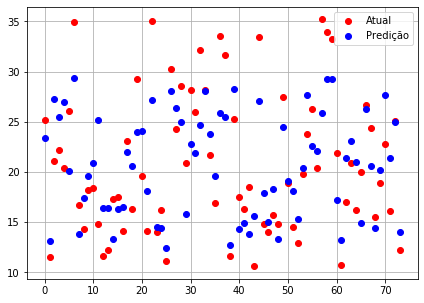

In [36]:
# visualização de dados antes de aplicar o algoritmo
xx = np.arange(0,74)
plt.figure(figsize=(7,5))
plt.plot(xx,df['Atual'],'or',label='Atual')
plt.plot(xx,df['Predição'],'ob',label='Predição')
plt.legend()
plt.show()

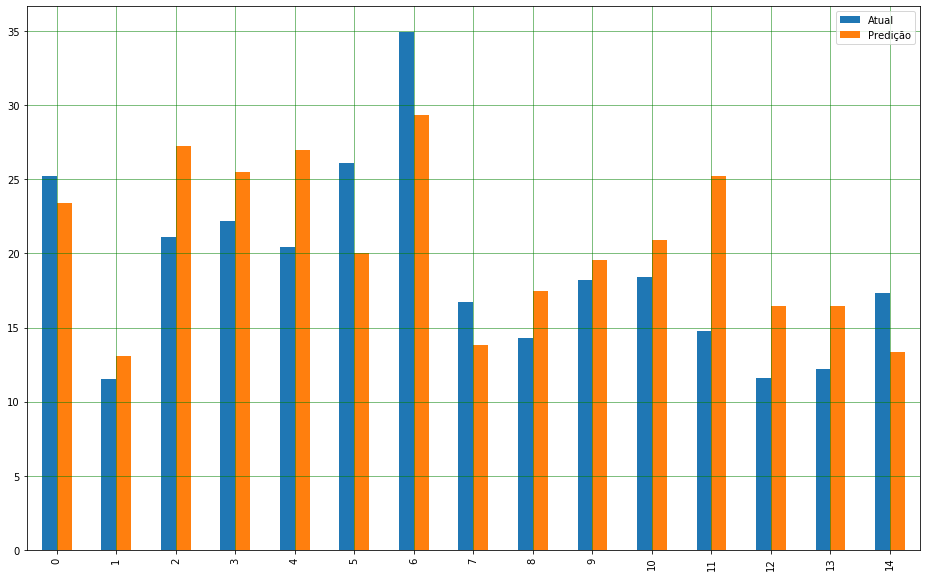

In [51]:
# visualizar os resultados amostra de 15 registros (amostra muito grande)
df1 = df.head(15)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

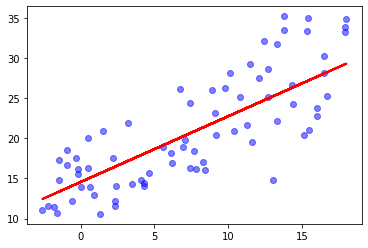

In [21]:
# linha reta com dados de teste
plt.scatter(X_test, y_test,  color='blue',alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [52]:
# Avaliar o desempenho do algoritmo
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score:', metrics.r2_score(y_test, y_pred))

MAE: 3.5094353112899594
MSE: 17.011877668640622
RMSE: 4.124545753006096
R2_score: 0.6412725627854521


---
Prof. [Jorge Zavaleta](zavaleta@pet-si.ufrrj.br), Sergio Serra - Macário Costa.